# Diabetes Prediction

## About Dataset

The data consist of medical information, laboratory analysis… etc. The data that have been entered initially into the system are: No. of Patient, Sugar Level Blood, Age, Gender, Creatinine ratio(Cr), Body Mass Index (BMI), Urea, Cholesterol (Chol), Fasting lipid profile, including total, LDL, VLDL, Triglycerides(TG) and HDL Cholesterol , HBA1C, Class (the patient's diabetes disease class may be Diabetic, Non-Diabetic, or Predict-Diabetic)

In [108]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [66]:
data=pd.read_csv(r"C:\Users\96655\Downloads\diabitic.csv",encoding='unicode_escape')

## Data Preprocessing

In [67]:
data.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         995 non-null    int64  
 1   No_Pation  995 non-null    int64  
 2   Gender     995 non-null    object 
 3   AGE        995 non-null    int64  
 4   Urea       995 non-null    float64
 5   Cr         995 non-null    int64  
 6   HbA1c      995 non-null    float64
 7   Chol       995 non-null    float64
 8   TG         995 non-null    float64
 9   HDL        995 non-null    float64
 10  LDL        995 non-null    float64
 11  VLDL       995 non-null    float64
 12  BMI        995 non-null    float64
 13  CLASS      995 non-null    object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.0+ KB


In [69]:
data.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [70]:
data.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,995.000000,9.950000e+02,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000
mean,340.314573,2.704370e+05,53.571859,5.118435,68.923618,8.282975,4.862332,2.352673,1.204975,2.610342,1.825025,29.557709
std,240.366618,3.389168e+06,8.729077,2.935102,60.126093,2.535472,1.301364,1.403779,0.661752,1.117462,3.621249,4.955155
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.500000,2.406450e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,301.000000,3.439500e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,549.500000,4.538250e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [71]:
data = data.rename(columns={"No_Pation" : "No of patients", "AGE" : "Age", "CLASS" : "Class"})

In [72]:
data.head()

,ID,No of patients,Gender,Age,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [73]:
class_mapping = {
    'N': 0,
    'N ':0,
    'Y': 1,
    'P': 0,
}
gender_mapping={'M':0,'F':1,'f':1}
data['Gender']=data['Gender'].replace(gender_mapping)
# Replace class labels with numerical values
data['Class'] = data['Class'].replace(class_mapping)

In [75]:
predictors=data.drop(["Class",'ID','No of patients'], axis=1)
Target=data['Class']

In [76]:
data

,ID,No of patients,Gender,Age,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,502,17975,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,194,454316,1,57,4.1,70,9.3,5.3,3.3,1.0,1.4,1.3,29.0,1
991,195,4543,1,55,4.1,34,13.9,5.4,1.6,1.6,3.1,0.7,33.0,1
992,196,454316,0,55,3.1,39,8.5,5.0,2.5,1.9,2.9,0.7,27.0,1
993,198,454316,0,28,3.5,61,8.5,4.5,1.9,1.1,2.6,0.8,37.0,1


Mapping the outputs Diabetic as 1 and, Prediabetic and Not Diabtetic as 0

In [77]:
# predictors=predictors.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(predictors)

X_train,X_test,Y_train,Y_test =train_test_split(X_scaled,Target,test_size=0.2,random_state=30)

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
LR_Classifier = LogisticRegression(max_iter=1000)
LR_Classifier.fit(X_train,Y_train)
X_train2,X_test2,Y_train2,Y_test2 =train_test_split(X_scaled,Target,test_size=0.2,random_state=30)
G_NaiveBayes = GaussianNB()
G_NaiveBayes.fit(X_train2,Y_train2)

GaussianNB()

In [79]:
LR_prediction=LR_Classifier.predict(X_test)
GNB_prediction=G_NaiveBayes.predict(X_test2)

In [114]:
print("The accuracy of Logistic Regression (Classifier) is "+str(metrics.accuracy_score(LR_prediction,Y_test)*100)+"%")
print("The accuracy of Normal Gaussian Naive Bayes Algorithm is "+str(metrics.accuracy_score(GNB_prediction,Y_test2)*100)+"%")

The accuracy of Logistic Regression (Classifier) is 93.46733668341709%
The accuracy of Normal Gaussian Naive Bayes Algorithm is 92.46231155778895%


In [118]:
print(classification_report(LR_prediction,Y_test))
print('|---------------------x--------------------------------x-----------------------|')
print(classification_report(GNB_prediction,Y_test2))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        33
           1       0.95      0.97      0.96       166

    accuracy                           0.93       199
   macro avg       0.89      0.86      0.88       199
weighted avg       0.93      0.93      0.93       199

|---------------------x--------------------------------x---------------------|
              precision    recall  f1-score   support

           0       0.87      0.70      0.78        37
           1       0.93      0.98      0.95       162

    accuracy                           0.92       199
   macro avg       0.90      0.84      0.87       199
weighted avg       0.92      0.92      0.92       199



CONFUSION MATRIX OF LOGISTIC REGRESSION
Confusion Matrix:
           Predicted 0  Predicted 1
Actual 0           25            8
Actual 1            5          161


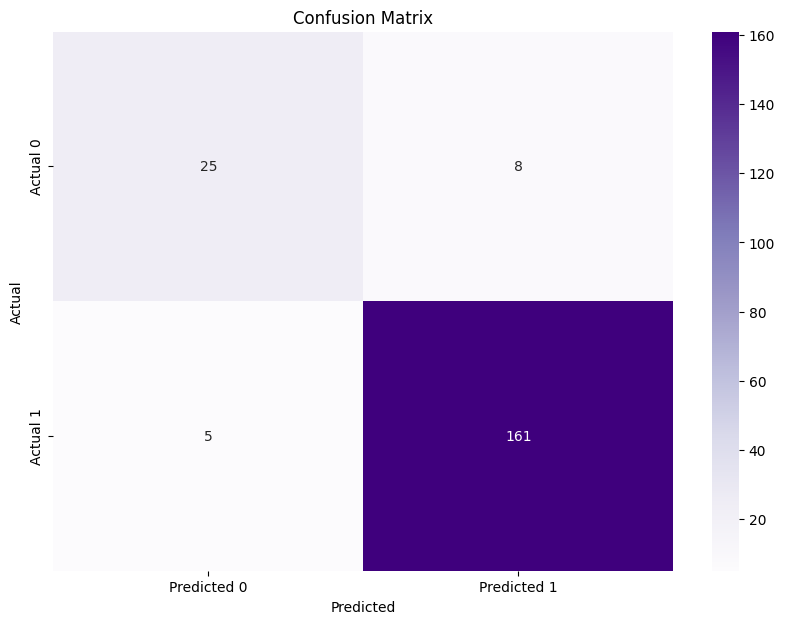

In [123]:
print('CONFUSION MATRIX OF LOGISTIC REGRESSION')
conf_matrix_lr = confusion_matrix(LR_prediction,Y_test)
conf_matrix_df = pd.DataFrame(conf_matrix_lr, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print("Confusion Matrix:\n", conf_matrix_df)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

CONFUSION MATRIX OF GAUSSIAN NAIVE BAYES
Confusion Matrix:
           Predicted 0  Predicted 1
Actual 0           26           11
Actual 1            4          158


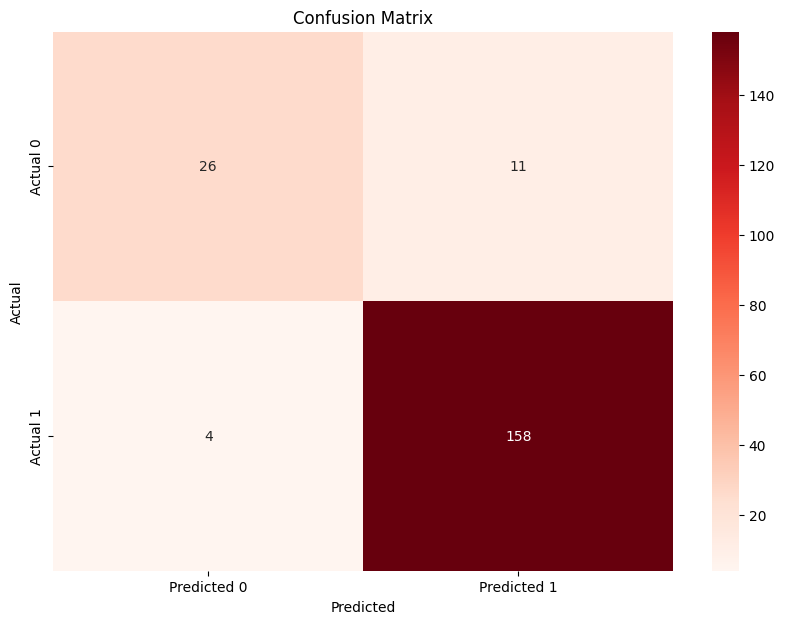

In [121]:
print('CONFUSION MATRIX OF GAUSSIAN NAIVE BAYES')
conf_matrix_gnb = confusion_matrix(GNB_prediction, Y_test)
conf_matrix_df = pd.DataFrame(conf_matrix_gnb, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print("Confusion Matrix:\n", conf_matrix_df)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Logistic Regression without Packages

In [99]:
import numpy as np

def sigmoid(x):
  x = np.clip(x, -500, 500)
  return (1/(1+np.exp(-x)))

class LogisticRegression():
    '''
    Logistic Regression classifier.

    Parameters:
    -----------
    lr : float, default=0.001
        Learning rate.
    n_iters : int, default=1000
        Number of iterations.

    Attributes:
    -----------
    weights : numpy.ndarray, shape (n_features,)
        Weights after fitting the model.
    bias : float
        Bias term after fitting the model.

    Methods:
    --------
    fit(X, y):
        Fit the logistic regression model.
    predict(X):
        Predict binary class labels for the input data.
    '''


    def __init__(self, lr=0.001, n_iters=1000):
        '''
        Initialize the LogisticRegression model with given learning rate and number of iterations.

        Parameters:
        -----------
        lr : float, optional, default=0.001
            Learning rate for gradient descent optimization.
        n_iters : int, optional, default=1000
            Number of iterations for the gradient descent algorithm.
        '''
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        '''
        Fit the logistic regression model to the training data.

        Parameters:
        -----------
        X : numpy.ndarray, shape (n_samples, n_features)
            Training data.
        y : numpy.ndarray, shape (n_samples,)
            Target values.

        Returns:
        --------
        self : object
            Fitted estimator.
        '''
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
                '''
        Predict binary class labels for the input data.

        Parameters:
        -----------
        X : numpy.ndarray, shape (n_samples, n_features)
            Input data.

        Returns:
        --------
        class_pred : list of int
            Predicted binary class labels (0 or 1).
        '''
                linear_pred = np.dot(X, self.weights) + self.bias
                y_pred = sigmoid(linear_pred)
                class_pred = [0 if y<=0.5 else 1 for y in y_pred]
                return class_pred


In [100]:
model = LogisticRegression(lr=0.001)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(predictors)

X_train,X_test,Y_train,Y_test =train_test_split(X_scaled,Target,test_size=0.2,random_state=30)

# Training model
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

In [102]:
def accuracy(y_pred, y_test):
    return (np.sum(y_pred==Y_test)/len(y_test))*100
acc = accuracy(y_pred, Y_test)

print(f'Accuracy of Logistic Regression implemeneted by us is {round(acc,2)} %')


Accuracy of Logistic Regression implemeneted by us is 91.46 %


In [109]:
print(classification_report(y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.97      0.64      0.77        45
           1       0.91      0.99      0.95       154

    accuracy                           0.91       199
   macro avg       0.94      0.82      0.86       199
weighted avg       0.92      0.91      0.91       199



Confusion Matrix:
           Predicted 0  Predicted 1
Actual 0           29           16
Actual 1            1          153


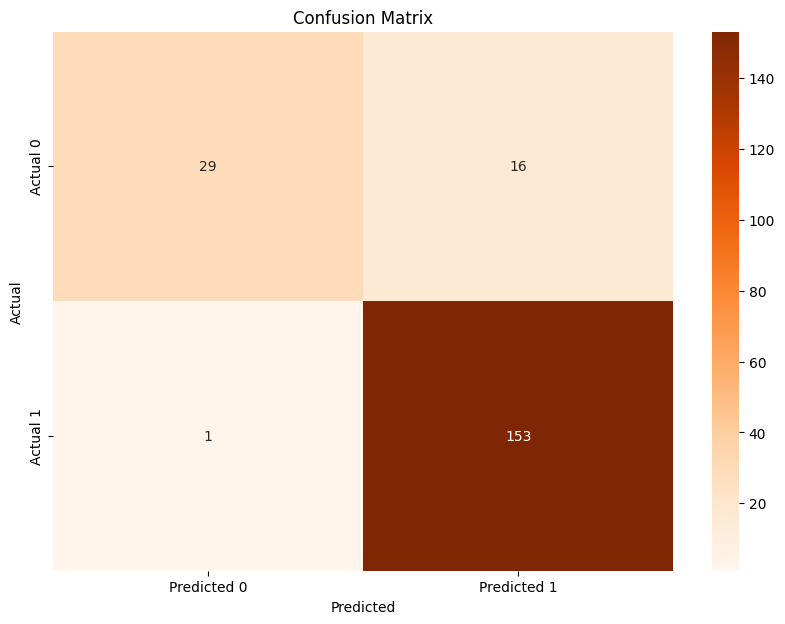

In [126]:
conf_matrix = confusion_matrix(y_pred, Y_test)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print("Confusion Matrix:\n", conf_matrix_df)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()